## Instructions
- See deadline on the course web page
- This problem set is solved individually. See examination rules on the course web page and the explanation of the examination procedure below.
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on. The extra problems are usually more challenging.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.
- While discussions with your peers are allowed (and even encouraged), direct plagiarism is not. Every student must reach their own understanding of submitted solutions according to the definition in the previous point.
- The use of coding assistance from code generating artificial intelligence tools is allowed. However, every student must reach their own understanding of submitted solutions (including employed algorithms) according to the definition above.
- Some problems include checkpoints in the form of `assert` statements. These usually check some basic functionality and you should make sure that your code passes these statements without raising an `AssertionError`. 
- Do not use other python modules than the ones included in the `environment.yml` file in the course github repo. 

- **Important:** The grading of problem sets requires **all** of the following actions:
  1. Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s).
  1. **Complete** the corresponding questions in Yata for every task that you have completed. This usually involves copying and pasting some code from your solution notebook and passing the code tests. You need to have a green check mark on Yata to get the corresponding points.
  1. **Upload** your solution in the form of your edited version of this Jupyter notebook via the appropriate assignment module in Canvas (separate for basic and extra tasks). It is the code and results in your submitted notebook that is considered to be your hand-in solution.
  1. If selected, be **available for a discussion** of your solution with one of the teachers on the Monday afternoon exercise session directly following the problem set deadline. No extra preparation is needed for these discussions apart from familiarity with your own solution. A list of randomly selected students will be published on the course web page around Monday noon. During the afternoon session that same day, students will be called in the numbered order until the end of the list (or the end of the exercise session). You must inform the responsible teacher as soon as possible following the publication of the student list if you can not be physically present at the exercise session (in which case we will have the discussion on zoom). An oral examination (on all aspects of the course) will be arranged during the exam week for students that do not show up for their discussion slot, or that fail to demonstrate familiarity with their hand-in solutions.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
- All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.


In [1]:
student_self_assessment = True

# 
# YOUR CODE HERE
# 

In [2]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 3 (Extra problems)
### Learning from data [TIF285], Chalmers, Fall 2024

Last revised: 30-Sep-2024 by Christian Forssén [christian.forssen@chalmers.se]

In [3]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 5: Bayesian optimization (3 points)
*You should have solved problem 3 to get some acquaintance with Gaussian Processes before doing this problem.*

In [4]:
# 
# YOUR CODE HERE
# 

import numpy as np
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp
import scipy.stats as stats

# Latex font
plt.style.use('default')
plt.rc('text', usetex = True)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
font_size = 12
plt.rcParams['font.size'] = font_size

### A univariate minimization problem

Try to minimize the function
$$
f(x) = \sin(6 x) + 0.2 x^2 - 0.7 x
$$
on the interval $x \in [-5,5]$.

The aim is to find the position of the minimum $x^*$ to within $\pm 0.05$ under the constraint that we would like to make as few function evaluations as possible.

### Plot the true function

a. **Plot the true function and indicate the position of the minimum**
Save the position of the *global* minimum in the variable `xtrue_min` (with at least two significant decimals)

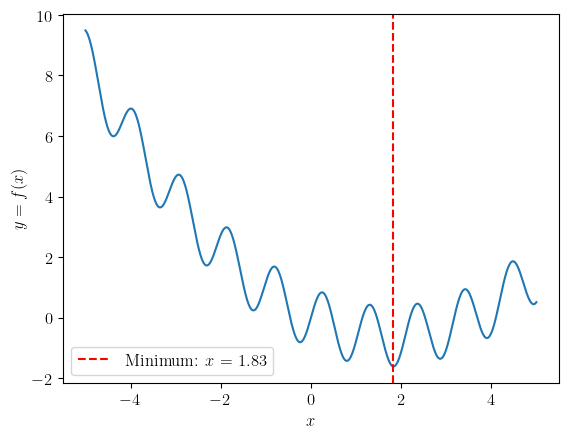

In [5]:
xmin =  -5.
xmax =  5.

X_domain = np.linspace(xmin,xmax,1000)

# 
# YOUR CODE HERE
# 

def f(x):
    '''
    Function to minimize.

    Args:
        x (float): input value.

    Returns:
        float: output value.
    '''
    return np.sin(6*x) + 0.2*x**2 - 0.7*x

# Evaluate the function
Y_domain = f(X_domain)
# Find the minimum
xtrue_min = X_domain[np.argmin(Y_domain)]
ytrue_min = np.min(Y_domain)

# Plot the function
plt.plot(X_domain, Y_domain)
plt.axvline(xtrue_min, color='r', linestyle='--', label='Minimum: $x$ = {:.2f}'.format(xtrue_min))
plt.xlabel('$x$')
plt.ylabel('$y = f(x)$')

plt.legend()
plt.show()

### Build your own BayesOpt algorithm

You will now implement a very different approach to minimize an objective function (this is a conventional name for the function that we are trying to minimize or maximize). The approach is known as **Bayesian optimization** and the basic idea is the following:
* Select a few random points, evaluate the unknown function at these samples and build a **Gaussian Process regression model** for the function output in the entire input range based on this data.
* Make a decision which point to sample next based on a so called **acquisition function** evaluated from the GP model. This decision will incorporate our current knowledge about the function including our uncertainty for its value in different regions.
* Improve the statistical model using the new sample. Continue sampling new points according to the acquisition function.
* If done correctly, this approach will balance **exploration** of new regions (with uncertain outputs, that might contain the minimum) and **exploitation** of the region that is currently most promising.
* Very importantly, this method also works when you are dealing with **noisy objective functions**, i.e. when your "measurement" of its value at a new point in parameter space contains some random noise.

Your task is to repeat the above minimization with **your own Bayesian Optimization algorithm**, that should be assembled as described below. Bayesian optimization algoritms are built into libraries such as `Scikit-optimize` and `GPyOpt`, but we will build our own simple version using functions from `numpy`, `scipy`, and `sklearn` (for building the statistical model).

The pseudo-code for BayesOpt is the following (see specific hints for your implementation at the end):
1. pick starting points $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\ldots \mathbf{x}^{(k)}$, where $k \geq 2$
1. evaluate the objective function $f(\mathbf{x})$ to obtain $y^{(i)}=f(\mathbf{x}^{(i)})$ for $i=1,\ldots,k$
1. initialize a data vector $\mathcal{D}_k = \left\{(\mathbf{x}^{(i)},y^{(i)})\right\}_{i=1}^k$
1. select a statistical model for $f(\mathbf{x})$
1. **For** {$n=k+1,k+2,\ldots$}
   1.    select $\mathbf{x}^{(n)}$ by optimizing the acquisition function: $\mathbf{x}^{(n)} = \underset{\mathbf{x}}{\text{arg max}}\, \mathcal{A}(\mathbf{x}|\mathcal{D}_{n-1})$
   1.    evaluate the objective function to obtain $y^{(n)}=f(\mathbf{x}^{(n)})$
   1.    augment the data vector $\mathcal{D}_n = \left\{\mathcal{D}_{n-1} , (\mathbf{x}^{(n)},y^{(n)})\right\}$
   1.    update the statistical model for $f(\mathbf{x})$
1. **end for**

   Check for the minimum in the data vector that has been collected (note that it doesn't necessarily have to be the last sample).


**Hints:**
* You have to implement all steps in the above pseudo-code.
* You can try with $k=2$ starting points.
* For the statistical model you can use a GP implemented with `sklearn.gaussian_process`. Follow the examples from the lectures and the demonstration notebook.
* Any knowledge about the objective function should be built into the covariance function. Let us assume that we don't have much information and that we use a standard RBF kernel.
* It is recommended to constrain the RBF lengthscale so that it doesn't become unrealistic small. With `sklearn.gaussian_process`, such a constraint on the RBF kernel correlation length can be imposed using `kernels.RBF(length_scale=1.0, length_scale_bounds=(0.1, 10.))`.
* Implement the so called Lower Confidence Bound (LCB) acquisition function for use in step 5A. Then, the acquisition function is simply: $\mathcal{A}(\boldsymbol{x}; | \mathcal{D}_{n-1}) = -\mu(\boldsymbol{x}) + \beta \sigma(\boldsymbol{x})$, where
  * $\mu(\boldsymbol{x})$ is the mean of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\sigma(\boldsymbol{x})$ is the standard deviation of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\beta$ is another hyperparameter for tuning the preference for exploring unknown regions. You can set $\beta = 3$.
* Remember that the GP model has to be updated (the hyperparameters re-optimized) at step 5D.
* It is possible that you get warnings during the optimization step. In any case, you might want to set `n_restarts_optimizer`to a number larger than 0 as the optimization of GP hyperparameters might be challenging.

**Tasks**
* Implement the BayesOpt minimizer
* Assume that you are allowed a total of 100 function evaluations ($k$ of them for the starting points and $100-k$ in the loop). Are you able to find the minimum to within $\pm 0.05$?
* Plot the final statistical model together with the true function. Show which points that have been explored.
* Plot also the convergence of the minimum value $\min(y_n)$ as a function of the iteration number $n \in \{1, \ldots, 100\}$. How many iterations do you need to find the minimum?

In [6]:
# Initialize the Bayesian Optimization by performing steps 1-4.
# You might want to try with different seeds.
#
# 
# YOUR CODE HERE
# 

# Rng
rng = np.random.default_rng(seed=19)
# Number of initial points
k = 2

# Initial points
x_start = rng.uniform(-5, 5, size=(k, 1))

# Evaluate the function at the initial points
y = f(x_start)

# Data initialization
data = np.hstack((x_start, y))

# Define the kernel as instructed
RBF_kernel = gp.kernels.RBF(length_scale=1., length_scale_bounds=(0.1, 10.))
# Define the Gaussian Process model with the RBF kernel
stat_model = gp.GaussianProcessRegressor(kernel=RBF_kernel, n_restarts_optimizer=10, normalize_y=True)


In [7]:
# You can use the utility function for plotting a GP prediction with credible interval from the basic problem 3.

# 
# YOUR CODE HERE
# 

def GPplot(X_new, mu_new, cov_new, ax=None, credibility=0.95, showsamples=False, numsamples=3):
    """
    Plot predictions of the GP regression model.

    Args:
        X_new: New input locations. List-like of length N_new.
        mu_new: GP regressor mean predictions. Array of shape (N_new,1).
        cov_new: GP regressor mean predictions. Array of shape (N_new, N_new).
        ax: Axes handle for plot. Will be created and returned if None. (default None)
        credibility: probability mass to include in the posterior prediction (float<1, default=0.95)
        showsamples: Include random draws from the GP in the plot. (boolean, default=False)
        numsamples: Number of random draws from the GP shown in the plot. (int, default=3, 
            max allowed=10). Ignored if 'samples'=False
    
    Returns:
        Axes handle
    """
    assert credibility < 1.
    assert credibility > 0.
    # Determine the width of the band
    bandwidth_factor = stats.norm.interval(credibility)[1]
       
    X_new = np.array(X_new).reshape(-1,1)
        
    credible_range_distance = bandwidth_factor * np.sqrt(np.diag(cov_new)).flatten()

    if ax is None:
        fig, ax = plt.subplots(1,1)
    ax.fill_between(X_new.flatten(), mu_new.flatten() + credible_range_distance, \
                    mu_new.flatten() - credible_range_distance, alpha=0.1)
    ax.plot(X_new, mu_new, label='Mean')

    # 
    # YOUR CODE HERE
    # 

    if showsamples:
        for i in range(numsamples):
            sample = np.random.multivariate_normal(mu_new.flatten(), cov_new)
            ax.plot(X_new, sample, '--')

    return ax

In [8]:
# Perform the loop, i.e. repeat steps 5A-D 100-k times
#
# For better performance of the BayesOptimizer it is desirable to shift the grid in each iteration
npoints=1000
xrange=xmax-xmin
dx=xrange/npoints
X_domain = np.linspace(xmin+dx*np.random.uniform(), xmax, 1000).reshape(-1,1)

#
# 
# YOUR CODE HERE
# 

def acquisition_function(model, x, beta=3.):
    '''
    Acquisition function to maximize.

    Args:
        model: Gaussian Process model.
        x (np.array): input value.
        beta (float): parameter.
    
    Returns:
        float: acquisition function value.
    '''

    # Use the model to predict the output of the input x-array
    mu, sigma = model.predict(x, return_std=True)
    return - mu + beta * sigma 

for i in range(100-k):
    
    # Train the model with the current date
    stat_model.fit(np.array(data[:i+k, 0]).reshape(-1,1), np.array(data[:i+k, 1]))

    # Find the next point to evaluate using the maximum of the acquisition function
    acq_values = acquisition_function(stat_model, X_domain)
    next_point = X_domain[np.argmax(acq_values)]
    
    # Evaluate the function at the new point
    y_new = f(next_point)
    
    # Update the data array
    data = np.append(data, np.array([next_point, y_new]).reshape(1,2), axis=0)

    # Update the model with the new data
    stat_model.fit(data[:, 0].reshape(-1,1), data[:, 1])

    # Shift the x-domain
    X_domain = np.linspace(xmin+dx*np.random.uniform(), xmax, 1000).reshape(-1,1)


/opt/miniconda3/envs/tif285-env/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/miniconda3/envs/tif285-env/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/miniconda3/envs/tif285-env/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/miniconda3/envs/tif285-env/lib/python3.12/site-

|ymin_bayes - ymin_true| = 0.00038
|xmin_bayes - xmin_true| = 0.00314
Optimized length scale parameter: 0.399
First fulfilled |x - x_min| < 0.05 at iteration: 19


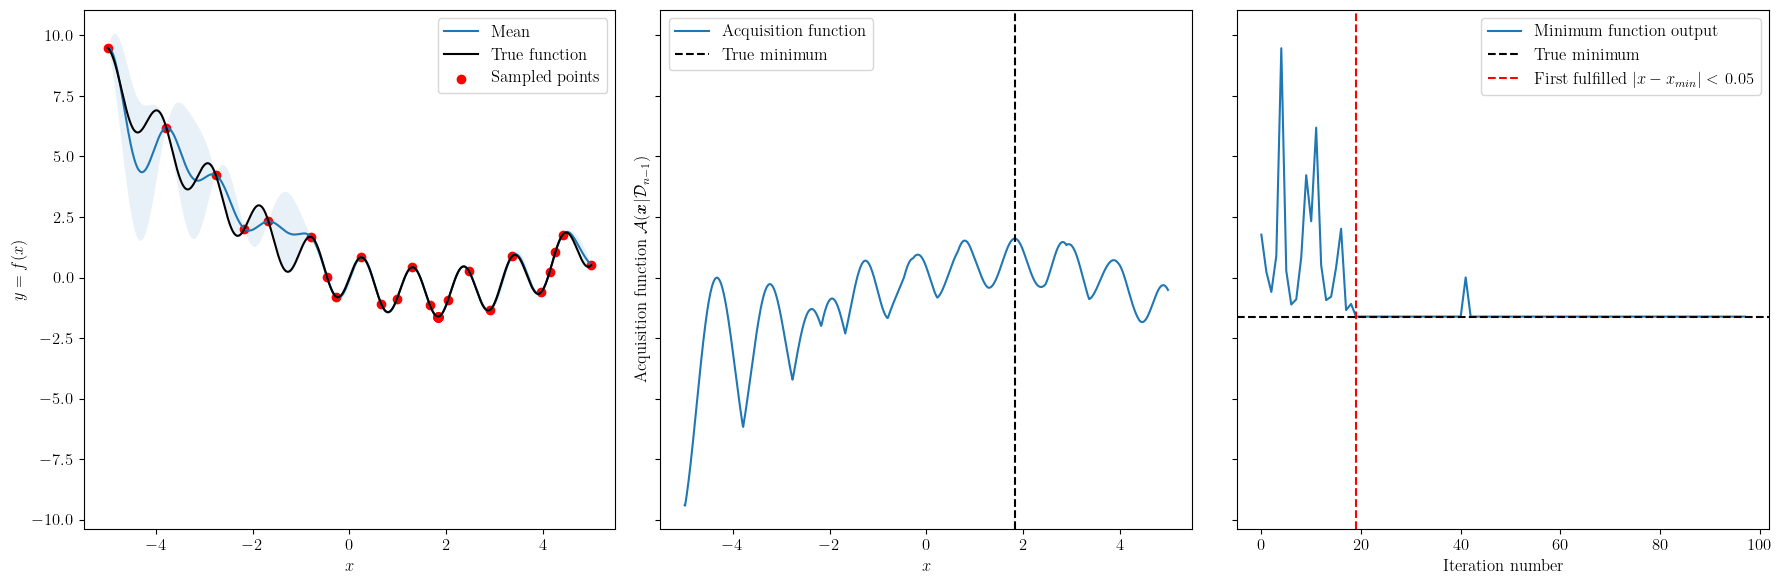

In [9]:
# Print the final result. Did you find the minimum to within 0.05?
# Print also the hyperparameters of the final statistical model
#
# Make three plots: 
# 1. The statistical model after the final sample.
#    Show which points that have been sampled during the run.
# 2. The acquisition function after the final sample.
# 3. The minimum function output as a function of the iteration number.
#    (i.e. what is the "best" output that has been found so far?)  
#    Compare to the true minimum of f(x)
#
#
# 
# YOUR CODE HERE
# 

# Print the final result
ymin_bayes = np.min(data[:, 1])
print('|ymin_bayes - ymin_true| = {:.5f}'.format(np.abs(ymin_bayes - ytrue_min)))
xmin_bayes = data[np.argmin(data[:, 1]), 0]
print('|xmin_bayes - xmin_true| = {:.5f}'.format(np.abs(xmin_bayes - xtrue_min)))

# Assert the minimum was found within 0.05
assert np.abs(ymin_bayes - ytrue_min) < 0.05, 'The minimum was not found within 0.05'
assert np.abs(xmin_bayes - xtrue_min) < 0.05, 'The minimum was not found within 0.05'

# Print hyperparameters
print('Optimized length scale parameter: {:.3f}'.format(stat_model.kernel_.length_scale))

fig, axs = plt.subplots(1,3, figsize=(18, 6), sharey=True)

# Plot the statistical model
mu, cov= stat_model.predict(X_domain, return_cov=True)
GPplot(X_domain, mu, cov, ax=axs[0])
axs[0].plot(X_domain, f(X_domain), color='k', label='True function')
axs[0].scatter(data[:, 0], data[:, 1], color='r', label='Sampled points')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y = f(x)$')
axs[0].legend(loc='upper right')

# Plot the acquisition function
axs[1].plot(X_domain, - mu + 3 * np.sqrt(np.diag(cov)), label='Acquisition function')
axs[1].axvline(xtrue_min, color='k', linestyle='--', label='True minimum')
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('Acquisition function $\\mathcal{A}(\\textbf{\\textit{x}}\\vert\\mathcal{D}_{n-1})$')
axs[1].legend()

# Plot the minimum function output
axs[2].plot(data[2:, 1], label='Minimum function output')
axs[2].axhline(ytrue_min, color='k', linestyle='--', label='True minimum')
# Find the first iteration where the condition is fulfilled
x_conditional = (np.abs(data[2:,0] - xtrue_min) < 0.05)
x_idx = np.where(x_conditional)[0][0]
print('First fulfilled |x - x_min| < 0.05 at iteration:', x_idx)
axs[2].axvline(x_idx, color='r', linestyle='--', label=f'First fulfilled $|x - x_{{min}}| <$ 0.05')
axs[2].set_xlabel('Iteration number')
axs[2].legend()

plt.tight_layout()
plt.show()


The figures seems reasonable, the acquisition function should be at its absolute maximum at the function minimum when all points have been sampled, since this should be the best $x$-position. The convergence of the minimum function output also looks good. We also see the typical characteristics of the statistical model, that the areas lacking sampled points has a higher deviation.

## Problem 6: A simple Bayesian binary classifier (4 points)
*You should have solved problem 4 before doing this problem.*

In [10]:
# Import modules
#
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

# Additional module import statements if needed
# 
# YOUR CODE HERE
# 

import emcee
import corner
import seaborn as sns

Create a bayesian binary classifier that can take $(E,|m|)$ as input data and predicts a binary label (0=below $T_c$, 1=above $T_c$). 
* Use only high- and low-tempterature data for training (so that predictions for intermediate temperature data should be more difficult). Use normalized data as in Task 4.
* The weights (and bias) of the single neuron binary classifier will be described by pdf:s that we will sample from using MCMC.
* Use a Gaussian prior on the two weights and the bias (with ``weight decay'' $\sigma = 1.0)$.
* Construct the (log) likelihood as in logistic regression. 
* Use, e.g., `emcee`, for the MCMC sampling.
* The prediction for a given input should be characterized by a pdf; i.e. the predicted probability for the state belonging to class 1 (above $T_c$) will itself be described by a pdf.

**Sub-tasks**

(a) Set up the training data

(b) Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

(c) Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

(d) Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

In [11]:
# Read data
T, Es, Ms = np.loadtxt(f'{DATA_DIR}/PS3_Prob4_data.txt',unpack=True)

input_data = np.column_stack((Es,Ms))

Tc = 2 / np.log(1+np.sqrt(2))
high_T = T>Tc

# High-temperature = 1
targets = high_T*np.ones_like(T,dtype=int)

**Subtask (a)**: Set up the training data
- Normalize the input data (mean=0, stddev=1)
- Use high- (T>3.5) and low-temperature (T<1.5) data for training. 
- Plot the training data, indicate the target output 1: T>Tc with red symbols and 0: T<Tc with blue symbols.


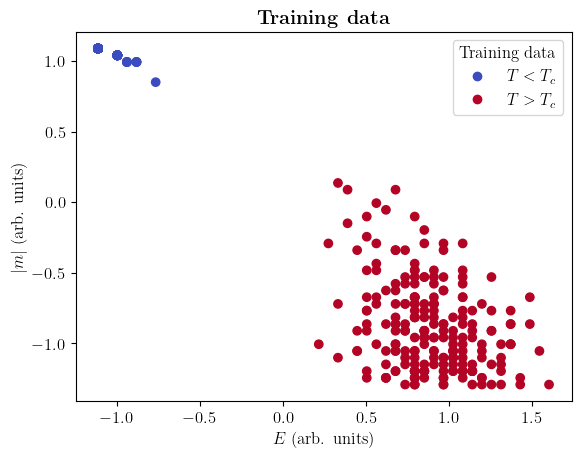

In [12]:
# 
# YOUR CODE HERE
# 

# Define the high and low temperature regions
high_T = T > 3.5
low_T = T < 1.5

# Concatenate the data of the high and low temperature regions
tot_T = np.concatenate((T[high_T], T[low_T]))

# Total targets (high and low and in between)
tot_targets = (T > Tc)*np.ones_like(T, dtype=int)

# Define the training data and normalize it
training_data = np.concatenate((input_data[high_T], input_data[low_T]))
training_data = (training_data - np.mean(training_data, axis=0))/np.std(training_data, axis=0)

# Targets
targets = (tot_T > Tc)*np.ones_like(tot_T, dtype=int)

# Plot the training data
plt.scatter(training_data[:,0], training_data[:,1], c=targets, cmap='coolwarm')
plt.plot([], [], 'o', color='#3B4CC0', label='$T < T_c$')
plt.plot([], [], 'o', color='#B40426', label='$T > T_c$')
plt.xlabel('$E$ (arb. units)')
plt.ylabel('$|m|$ (arb. units)')

plt.title('$\\textbf{Training data}$')
plt.legend(title='Training data')
plt.show()

In [13]:
# Single neuron classifier code from Problem 4 is probably needed to implement the Bayesian neuron

def sigmoid(a):
    '''Sigmoid function with input argument a that is the activation'''
    # 
    # YOUR CODE HERE
    # 

    return 1 / (1 + np.exp(-a))

def single_neuron(x, w):
    """
    Single neuron prediction, k inputs, 1 output.
    
    Args:
        x (array[float]): input to the neuron. x.shape=(N,k) 
        w (array[float]): weights, w.shape=(k+1,)
            The zero index weight is the bias term.

    Returns:
        y (float): the output of the neuron
    """
    # 
    # YOUR CODE HERE
    # 
    
    b = w[0]
    w = w[1:].reshape(1,-1)
    return sigmoid(w @ x.T + b)[0]

In [14]:
# Define the log prior, likelihood, posterior
#
# 
# YOUR CODE HERE
# 

def log_prior(w):
    """
    Log prior for the weights w.
    
    Args:
        w (array[float]): weights. w.shape=(k+1,)
            The zero index weight is the bias term.
    
    Returns:
        float: log prior
    """
    # 
    # YOUR CODE HERE
    # 

    # Log prior is a normal distribution with mean 0 and "weight decay" 1
    return stats.norm.logpdf(w, loc=0, scale=1).sum()

def log_likelihood(w, data, targets):
    """
    Log likelihood for the weights w.
    
    Args:
        w (array[float]): weights. w.shape=(k+1,)
            The zero index weight is the bias term.
        data (array[float]): input data. data.shape=(N,k)
        targets (array[int]): targets. targets.shape=(N,)
    
    Returns:
        float: log likelihood
    """
    # 
    # YOUR CODE HERE
    # 

    # Use the single_neuron to predict the output
    y = single_neuron(data, w)

    # Log likelihood is the cross-entropy loss
    return np.sum(targets * np.log(y) + (1 - targets) * np.log(1 - y))

def log_posterior(w, data, targets):
    return log_prior(w) + log_likelihood(w, data, targets)


**Sub-task (b)**: Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

In [15]:
# 
# YOUR CODE HERE
# 

### Rng
rng = np.random.default_rng(seed=19)

### Setting up the sampler with initial positions
pos = np.array([[0, 1, -1]]) + 2*rng.standard_normal((20, 3))
nwalkers, ndim = pos.shape

### Running the sampler with training data and targets as args
sampler = emcee.EnsembleSampler(nwalkers=nwalkers, ndim=ndim, log_prob_fn=log_posterior, args=(training_data, targets))
run = sampler.run_mcmc(pos, 10000)


Number of samples: 190000


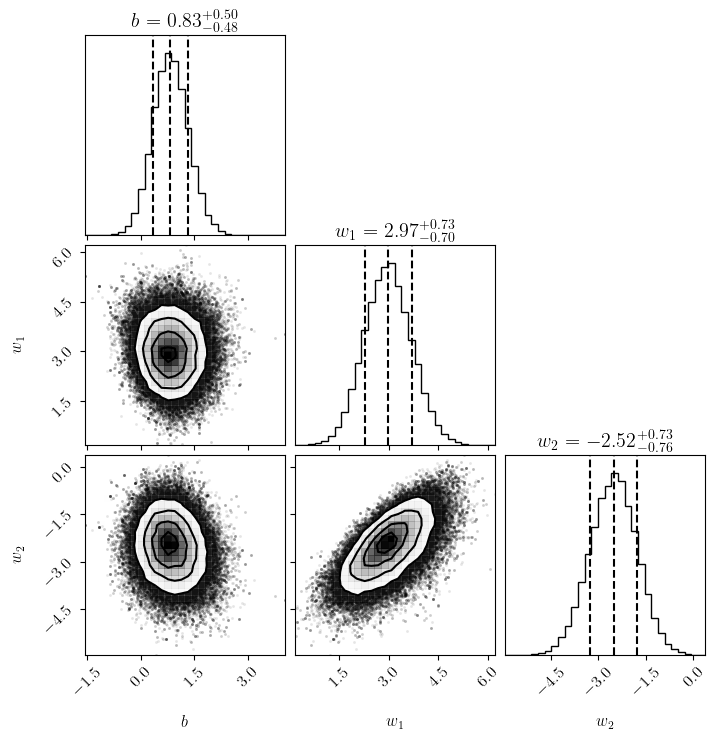

In [16]:
# Discard 500 samples as warmup
nwarmup = 500
samples = sampler.get_chain(discard=nwarmup, flat=True)
print(f'Number of samples: {len(samples)}')

### Using corner to plot the samples
fig = corner.corner(samples, labels=[r"$b$", r"$w_1$", r"$w_2$"], color='k',
                    show_titles=True, bins=30, plot_contours=True, 
                    quantiles=[0.16, 0.5, 0.84], plot_datapoints=True)

# Seems reasonable that the weights are correlated but the bias is not correlated with the weights


**Sub-task (c)**: Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

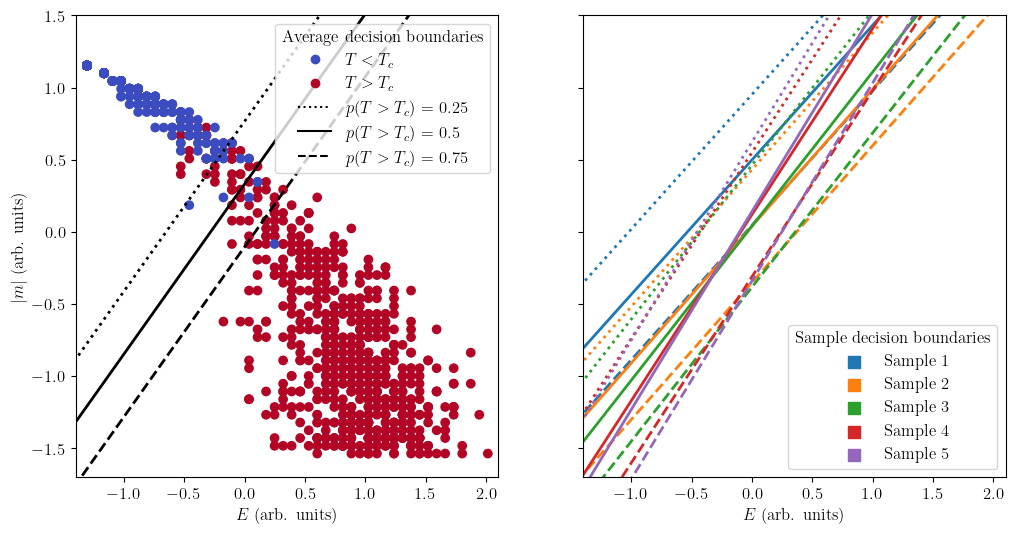

In [17]:
# 
# YOUR CODE HERE
# 

samples = sampler.get_chain(discard=nwarmup, flat=True)
# Retrieve 5 random samples
n_samples = 5
# The choice() function with replace=False ensures that the samples are unique,
# the first is basically the indices of the samples
idx = rng.choice(len(samples), size=n_samples, replace=False)
fig, axs = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)

# Define a grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Compute the weight means
w_means = np.mean(samples, axis=0)
# Compute the average decision boundaries, Z is the output of the neuron
Z = single_neuron(np.column_stack((X.flatten(), Y.flatten())), w_means).reshape(X.shape)
axs[0].contour(X, Y, Z, levels=[0.25], linewidths=2, colors='k', linestyles=':')
axs[0].contour(X, Y, Z, levels=[0.5], linewidths=2, colors='k', linestyles='-')
axs[0].contour(X, Y, Z, levels=[0.75], linewidths=2, colors='k', linestyles='--')

# Plot all of the data
axs[0].scatter((input_data[:,0] - np.mean(input_data[:,0]))/np.std(input_data[:,0]), 
                (input_data[:,1] - np.mean(input_data[:,1]))/np.std(input_data[:,1]), 
                c=tot_targets, cmap='coolwarm')

# Labels
axs[0].plot([], [], 'o', color='#3B4CC0', label='$T < T_c$')
axs[0].plot([], [], 'o', color='#B40426', label='$T > T_c$')
axs[0].plot([], [], 'k:', label='$p(T > T_c)$ = 0.25')
axs[0].plot([], [], 'k-', label='$p(T > T_c)$ = 0.5')
axs[0].plot([], [], 'k--', label='$p(T > T_c)$ = 0.75')

axs[0].legend(title='Average decision boundaries', loc='upper right')
axs[0].set_xlabel('$E$ (arb. units)')
axs[0].set_ylabel('$|m|$ (arb. units)')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i, idx in enumerate(idx):
    # Take the weights for a single sample
    w = samples[idx]
    # Compute the decision boundaries, Z is the output of the neuron
    Z = single_neuron(np.column_stack((X.flatten(), Y.flatten())), w).reshape(X.shape)
    axs[1].contour(X, Y, Z, levels=[0.25], linewidths=2, colors=colors[i], linestyles=':')
    axs[1].contour(X, Y, Z, levels=[0.5], linewidths=2, colors=colors[i], linestyles='-')
    axs[1].contour(X, Y, Z, levels=[0.75], linewidths=2, colors=colors[i], linestyles='--')
    axs[1].scatter([], [], marker='s', color=colors[i], label=f'Sample {i+1}', s=64)

axs[1].legend(title='Sample decision boundaries', loc='lower right')
axs[1].set_xlabel('$E$ (arb. units)')

plt.xlim(-1.4, 2.1)
plt.ylim(-1.7, 1.5)
plt.show()


**Sub-task (d)**: Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

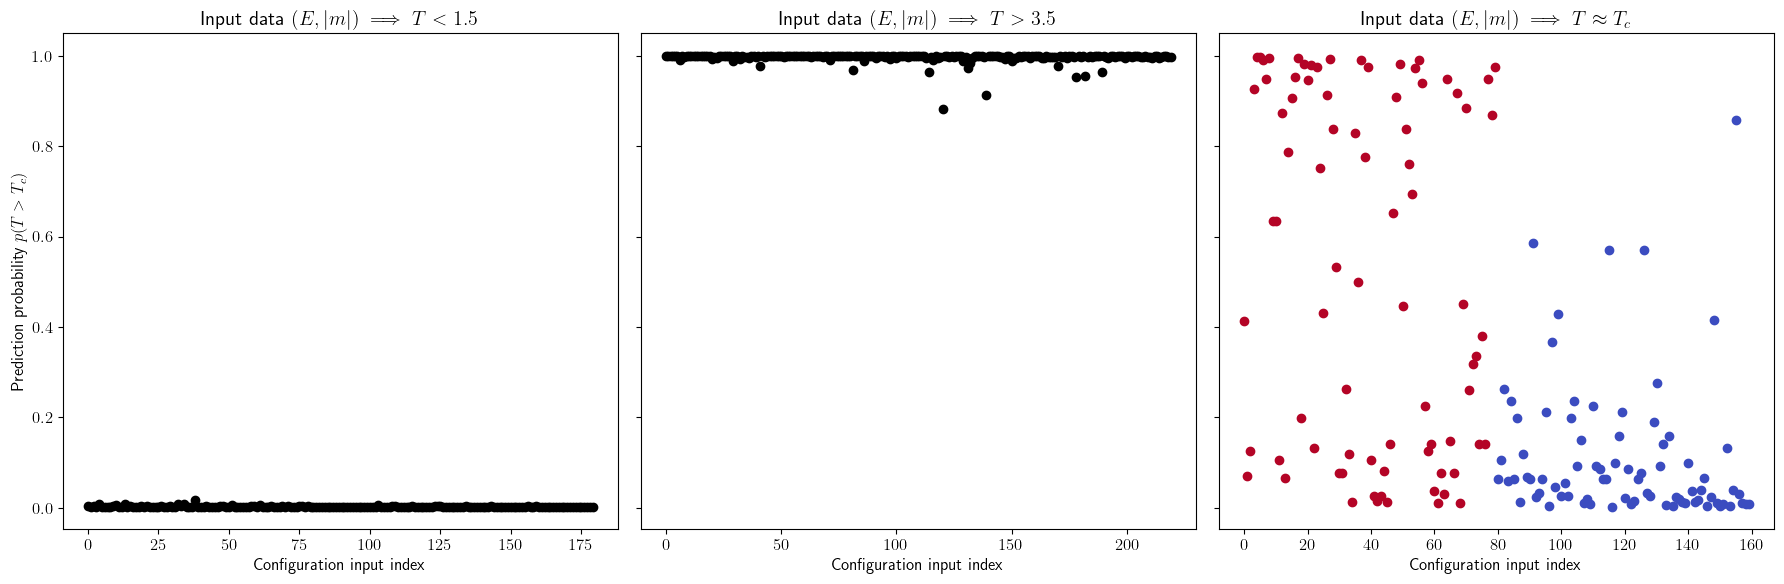

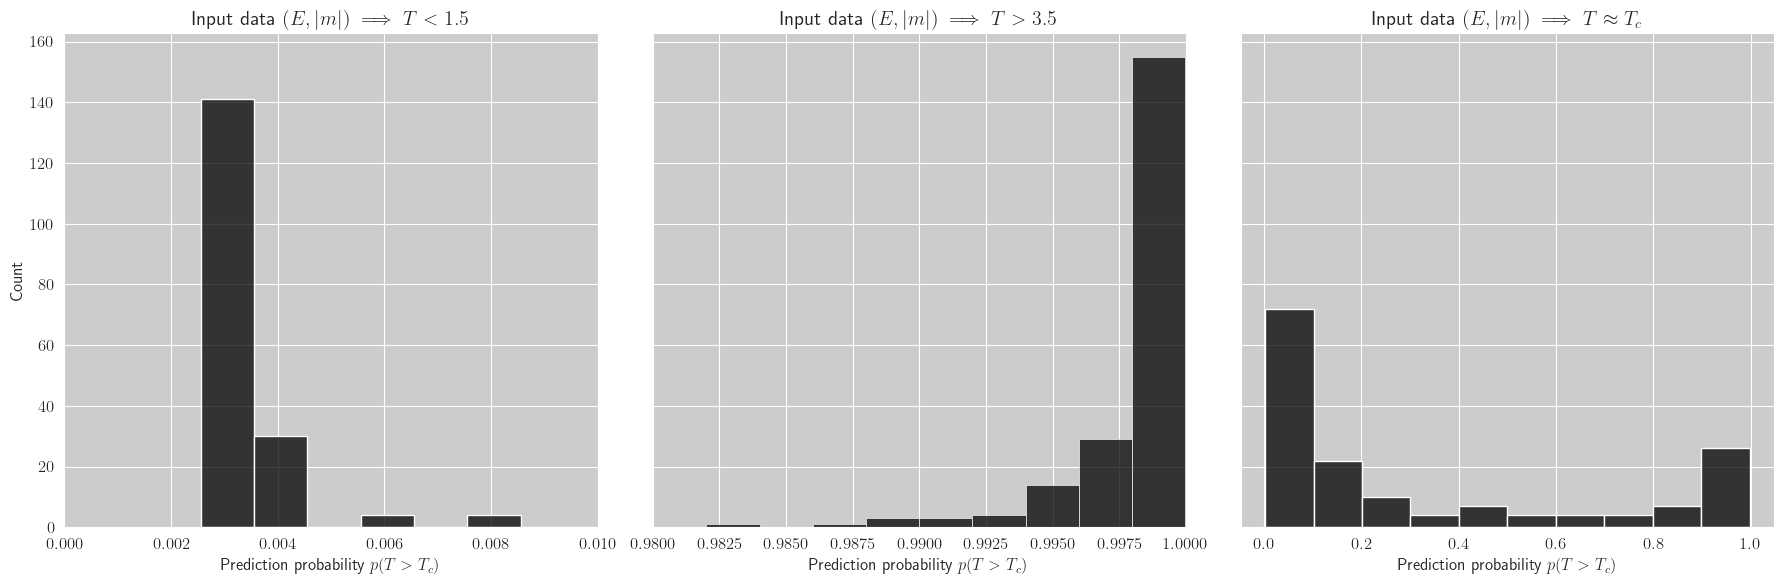

In [18]:
# 
# YOUR CODE HERE
# 

# Define the high and low temperature regions
low_Tconf = input_data[low_T]
high_Tconf = input_data[high_T]

# Close to the critical temperature, between +-0.2
c_T = (T > Tc-0.2) & (T < Tc+0.2)
close_Tconf = input_data[c_T]
T_s_close = T[c_T]

# Normalize the data
mean = np.mean(input_data, axis=0)
std = np.std(input_data, axis=0)
low_Tconf = (low_Tconf - mean) / std
high_Tconf = (high_Tconf - mean) / std
close_Tconf = (close_Tconf - mean) / std

# Compute the probabilities for the three regions using the activation
p_low = single_neuron(low_Tconf, w_means)
p_high = single_neuron(high_Tconf, w_means)
p_close = single_neuron(close_Tconf, w_means)
probs = [p_low, p_high, p_close]

fig1, axs1 = plt.subplots(1,3, figsize=(18,6), sharey=True)
sns.set_style('darkgrid', {'axes.facecolor': '0.8'})

# Plot the probabilities as a function of the input data index
for i, p in enumerate(probs):
    if i == 2:
        for j in range(len(p)):
            if T_s_close[j] > Tc:
                axs1[i].plot(j, p[j], 'o', color='#B40426')
            else:
                axs1[i].plot(j, p[j], 'o', color='#3B4CC0')
    else:
        axs1[i].plot(p, 'o', color='k')
    axs1[i].set_title(['Input data $(E, |m|) \\implies T < 1.5$', 'Input data $(E, |m|) \\implies T > 3.5$', 'Input data $(E, |m|) \\implies T \\approx T_c$'][i])
    axs1[i].set_xlabel('Configuration input index')

axs1[0].set_ylabel('Prediction probability $p(T > T_c)$')
fig1.tight_layout()

fig2, axs2 = plt.subplots(1,3, figsize=(18,6), sharey=True)
sns.set_style('darkgrid', {'axes.facecolor': '0.8'})

# Plot the probabilities as histograms, using different binwidths in order
# to see the distributions more clearly/same scale
binwidths = [0.001, 0.002, 0.1]
for i, p in enumerate(probs):
    sns.histplot(p, ax=axs2[i], color='k', binwidth=binwidths[i])
    axs2[i].set_title(['Input data $(E, |m|) \\implies T < 1.5$', 'Input data $(E, |m|) \\implies T > 3.5$', 'Input data $(E, |m|) \\implies T \\approx T_c$'][i])
    axs2[i].set_xlabel('Prediction probability $p(T > T_c)$')

axs2[0].set_xlim(0, 0.01)
axs2[1].set_xlim(0.98, 1)

fig2.tight_layout()
plt.show()
